In [102]:
import numpy as np
from matplotlib import pyplot as plt
from ReferenceElement import *
import os
import imageio
from rewrite import *
%matplotlib inline
from matplotlib.lines import Line2D

In [103]:
def analytical_u(x,xp,t):
    for i in range(len(x)):
        if np.round(x[i][-1],6) == np.round(xp,6):
            k = i
            pass
    u_left  = [np.cos(x[i]+t) for i in range(k+1)]
    u_right = [np.sin(x[i]-t) for i in range(k+1,len(x))]
    u = np.array(u_left+u_right)
    return u
        
def analytical_p(x,xp,t):
    for i in range(len(x)):
        if np.round(x[i][-1],6) == np.round(xp,6):
            k = i
            break
    p_left  = [-np.sin(x[i]+t) for i in range(k+1)]
    p_right = [-np.cos(x[i]-t) for i in range(k+1,len(x))]
    p = np.array(p_left+p_right)
    return p
    
def analytical_q(x,xp,t):
    for i in range(len(x)):
        if np.round(x[i][-1],6) == np.round(xp,6):
            k = i
            break
    q_left  = [-np.sin(x[i]+t) for i in range(k+1)]
    q_right = [np.cos(x[i]-t) for i in range(k+1,len(x))]
    q = np.array(q_left+q_right)
    return q


N = 8
K = 16
CF = 2.**(-7)
start = -2.*np.pi
end = 2.*np.pi
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K
t = 0.

reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [104]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)
dt = CF*dx_min
print(dt)

0.00030753861835592505


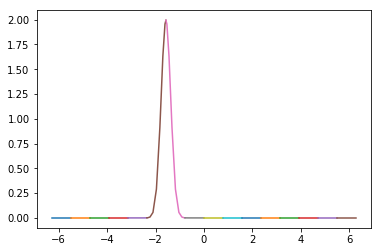

In [105]:
def potential(x,sigma,x0):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-x0)**2/(2*sigma**2))
#     return 0*x
sigma = 0.2
x0 = -np.pi/2
potential_term = potential(x,sigma,x0)
for i in range(len(x)):
    plt.plot(x[i],potential_term[i])


In [106]:
np.pi

3.141592653589793

11


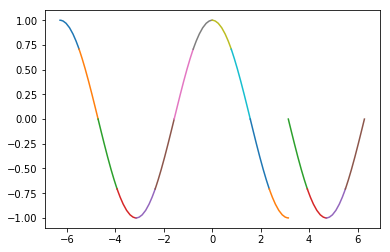

In [107]:
xp = np.pi
for i in range(len(x)):
        if np.round(x[i][-1],6) == np.round(xp,6):
            k_xp = i
            break
print(i)
def source_minus_A(t):
    return -np.cos(xp-t) - np.sin(xp+t)
def source_D_dot(t):
    return  np.cos(xp-t) - np.sin(xp+t)
u = analytical_u(x, np.pi,0)
for i in range(len(u)):
    plt.plot(x[i],u[i])

In [108]:
t = 0.
t_target = 50
nt = int((t_target-t)/dt)
u = analytical_u(x,xp,t)
p = analytical_p(x,xp,t)
q = analytical_q(x,xp,t)
q = x*0
p = x*0
u = x*0
print (nt)


162581


In [109]:
# plt.plot(x.flatten(), u.flatten(), label = 'u')
# plt.plot(x.flatten(), p.flatten(), label = 'p')
# plt.plot(x.flatten(), q.flatten(), label = 'q')
# plt.legend()
#plt.ylim(-1.5,1.5)

In [110]:
direc = "result_potential_trivial_initial"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []

In [111]:
t_int = [0]
u_jump =[u[k_xp+1][0]-u[k_xp][-1]]
p_jump =[p[k_xp+1][0]-p[k_xp][-1]]
q_jump =[q[k_xp+1][0]-q[k_xp][-1]]
for i in range(nt):
    un = u.copy()
    pn = p.copy()
    qn = q.copy()
    u = RK4_Step(dt, du_dt,un,pn,qn,K,N,t,M_inv,M_inv_S,False)
    p = RK4_Step(dt, dp_dt,pn,un,qn,K,N,t,M_inv,M_inv_S,True,source_minus_A, source_D_dot,k_xp,potential_term)
    q = RK4_Step(dt, dq_dt,qn,un,pn,K,N,t,M_inv,M_inv_S,True,source_minus_A, source_D_dot,k_xp)
    t += dt
    if i% int(nt/200) ==0:
        t_int.append(t) 
        u_jump.append(u[k_xp+1][0]-u[k_xp][-1])
        p_jump.append(p[k_xp+1][0]-p[k_xp][-1])
        q_jump.append(q[k_xp+1][0]-q[k_xp][-1])
        plt.figure(figsize=(8,6), dpi=500)
        u_ana = analytical_u(x,xp,t)
        for i in range(len(u_ana)):
#             plt.plot(x[i],u_ana[i],linestyle = '--', color = 'black')
            plt.plot(x[i],potential_term[i],linestyle = '--', color = 'black')
            plt.plot(x[i],u[i])
        plt.title('u at t = '+str(np.round(t,3)))
        plt.xlabel('r')
        plt.ylim(-2,2)
        lines = Line2D([0], [0], color = "black",linewidth =2, linestyle='--',label = 'V(r)')
        plt.legend(handles= [lines])
        name = direc+"/figure"+str(np.round(t,3))+'.png'
        plt.savefig(name)
        images.append(imageio.imread(name))
        plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)

No handles with labels found to put in legend.


49.99993611099888


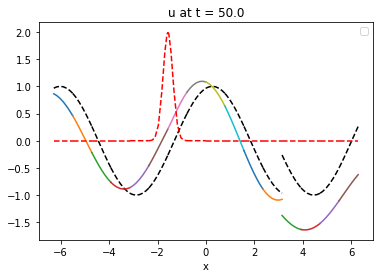

In [112]:
print(t)
u_ana = analytical_u(x,xp,t)
for i in range(len(u_ana)):
    plt.plot(x[i],u_ana[i],linestyle = '--', color = 'black')
    plt.plot(x[i],u[i])
    plt.plot(x[i],potential_term[i],linestyle = '--', color = 'red')
plt.title('u at t = '+str(np.round(t,3)))
plt.xlabel('x')
plt.legend()


In [113]:
# for i in range(len(x)):
#     plt.plot(x[i], (u/u_ana)[i])
# plt.ylim(-5,5)

In [98]:
# plt.plot(x.flatten(),np.log10(u-u_ana).flatten())

In [99]:
# p_ana = analytical_p(x,xp,t)
# for i in range(len(p_ana)):
#     plt.plot(x[i],p_ana[i],linestyle = '--', color = 'black')
#     plt.plot(x[i],p[i])
# plt.title('p at t = '+str(np.round(t,3)))
# plt.xlabel('x')


In [100]:
# q_ana = analytical_q(x,xp,t)
# for i in range(len(q_ana)):
#     plt.plot(x[i],q_ana[i],linestyle = '--', color = 'black')
#     plt.plot(x[i],q[i])
# plt.title('q at t = '+str(np.round(t,3)))
# plt.xlabel('x')

NameError: name 'ana_u_jump' is not defined

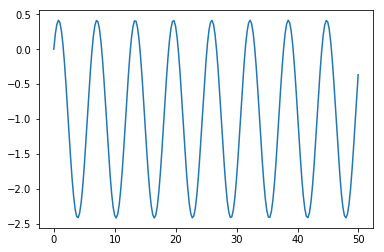

In [101]:
def analytical_u_jump(xp,t):
    return np.sin(xp-t) - np.cos(xp-t)
u_jump = np.array(u_jump)
t_int = np.array(t_int)
plt.plot(t_int,u_jump)
plt.plot(t_int,ana_u_jump, linestyle = '--')

In [ ]:

ana_u_jump = analytical_u_jump(xp,t_int)
plt.plot(t_int, np.log10(np.abs((u_jump-ana_u_jump)/ana_u_jump)))

In [ ]:
plt.plot(t_int,p_jump)
def analytical_p_jump(xp,t):
    return -np.cos(xp-t) + np.sin(xp+t)
ana_p_jump = analytical_p_jump(xp,t_int)
plt.plot(t_int, ana_p_jump, linestyle = '--')

In [ ]:
plt.plot(t_int, np.log10(np.abs((p_jump-ana_p_jump)/ana_p_jump)))

In [ ]:
plt.plot(t_int,q_jump)
def analytical_q_jump(xp,t):
    return np.cos(xp-t) + np.sin(xp+t)
ana_q_jump = analytical_q_jump(xp,t_int)
plt.plot(t_int, ana_q_jump, linestyle = '--')

In [ ]:
plt.plot(t_int, np.log10(np.abs((q_jump-ana_q_jump)/ana_q_jump)))